<a href="https://colab.research.google.com/github/Enovak001/SpaceJamTitanic/blob/main/SpaceJamTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import models from SciKit-Learn (sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Import Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split

# To be able to view an image
from IPython.display import Image
import numpy as np

# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


### Data description:

`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

`Destination` - The planet the passenger will be debarking to.

`Age` - The age of the passenger.

`VIP` - Whether the passenger has paid for special VIP service during the voyage.

`RoomService, FoodCourt, ShoppingMall, Spa, VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`Name` - The first and last names of the passenger.

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [ ]:
# Getting train data
test_list = pd.read_csv('/content/drive/MyDrive/Spaceship_Titanic_binary_class/test.csv')
print(test_list.describe())
print(test_list.head())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4197.000000  
mean     310.710031  
std     1246.994742  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       36.000000  
max    22272.000000  
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth    

In [ ]:
# Getting test data
train_list = pd.read_csv('/content/drive/MyDrive/Spaceship_Titanic_binary_class/train.csv')
print(train_list.describe())
print(train_list.head())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa    

In [ ]:
raw_train_df=pd.DataFrame(train_list, index=None)
raw_train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
raw_train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
# make a copy of dataframe... otherwise we mess also raw_train_df
df_temp = raw_train_df.copy()
df_temp

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Train data Feature engineering

In [ ]:
train_pass_id = raw_train_df.PassengerId
train_pass_id

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [ ]:
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
# This will turn all string value into categories
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype('category').cat.as_ordered()

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   category
 1   HomePlanet    8492 non-null   category
 2   CryoSleep     8476 non-null   category
 3   Cabin         8494 non-null   category
 4   Destination   8511 non-null   category
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   category
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   category
 13  Transported   8693 non-null   bool    
dtypes: bool(1), category(7), float64(6)
memory usage: 1.4 MB


In [ ]:
df_temp.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Filling in missing numerical features with `median` value

In [ ]:
# This will list all numeric columns
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [ ]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [ ]:
# Fill numeric columns with median value
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
          # Add a binary column which tells us if the data was missing or not
          df_temp[label+'_is_missing'] = pd.isnull(content)
          # Fill missing numeric valeus with median
          fill_in_median = content.fillna(content.median())
          df_temp[label] = fill_in_median

In [ ]:
# Check for more numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
# Check to see how many examples were missing

df_temp.ShoppingMall.value_counts()

0.0       5795
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64

In [ ]:
df_temp.isna().sum()

PassengerId                  0
HomePlanet                 201
CryoSleep                  217
Cabin                      199
Destination                182
Age                          0
VIP                        203
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Name                       200
Transported                  0
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
dtype: int64

### Filling in missing categorical features with corresponding values

In [ ]:
# check for columns that are not numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
df_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_is_missing,RoomService_is_missing,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False,False,False,False,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,False,False,False,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,False,False,False,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False,False,False,False,False,False


#### Data description:

`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [ ]:
df_temp[["Cabin_deck","Cabin_no.","Cabin_side"]]=df_temp["Cabin"].str.split("/",expand=True)
df_temp.drop(columns=["Cabin"],inplace=True)

df_temp[["firstname","last_name"]]=df_temp["Name"].str.split(" ",expand=True)
df_temp.drop(columns=["Name"],inplace=True)

df_temp[["PassengerId_group","PassenngerId_no"]]=df_temp["PassengerId"].str.split("_",expand=True)
df_temp.drop(columns=["PassengerId"],inplace=True)   # -> we have train_pass_id

In [ ]:
train_pass_id

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [ ]:
df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,Cabin_deck,Cabin_no.,Cabin_side,firstname,last_name,PassengerId_group,PassenngerId_no
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,False,False,False,B,0,P,Maham,Ofracculy,0001,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,False,False,False,F,0,S,Juanna,Vines,0002,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,False,False,False,A,0,S,Altark,Susent,0003,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,False,False,False,A,0,S,Solam,Susent,0003,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,False,False,False,F,1,S,Willy,Santantines,0004,01


In [ ]:
# check for columns that are not numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

HomePlanet
CryoSleep
Destination
VIP
Cabin_deck
Cabin_no.
Cabin_side
firstname
last_name
PassengerId_group
PassenngerId_no


In [ ]:
df_temp.isna().sum()

HomePlanet                 201
CryoSleep                  217
Destination                182
Age                          0
VIP                        203
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
Cabin_deck                 199
Cabin_no.                  199
Cabin_side                 199
firstname                  200
last_name                  200
PassengerId_group            0
PassenngerId_no              0
dtype: int64

In [ ]:
# Turn categorical variables into numbers and fill missing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate weather sample has a missing value
        df_temp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes +1

In [ ]:
# Check for more categorical columns have null values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
df_temp.isna().sum()

HomePlanet                      0
CryoSleep                       0
Destination                     0
Age                             0
VIP                             0
RoomService                     0
FoodCourt                       0
ShoppingMall                    0
Spa                             0
VRDeck                          0
Transported                     0
Age_is_missing                  0
RoomService_is_missing          0
FoodCourt_is_missing            0
ShoppingMall_is_missing         0
Spa_is_missing                  0
VRDeck_is_missing               0
Cabin_deck                      0
Cabin_no.                       0
Cabin_side                      0
firstname                       0
last_name                       0
PassengerId_group               0
PassenngerId_no                 0
HomePlanet_is_missing           0
CryoSleep_is_missing            0
Destination_is_missing          0
VIP_is_missing                  0
Cabin_deck_is_missing           0
Cabin_no._is_m

In [ ]:
df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing,PassengerId_group_is_missing,PassenngerId_no_is_missing
0,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df_temp.drop('Transported', axis=1)
y = df_temp.Transported

In [ ]:
#split the data into train and test sets

np.random.seed(42)

X_train = X.iloc[:int(len(X) * 0.8), :]
X_val = X.iloc[int(len(X) * 0.8):, :]
y_train = y.iloc[:int(len(y) * 0.8)]
y_val = y.iloc[int(len(y) * 0.8):]

## Test data Feature engineering

In [ ]:
test_df=pd.DataFrame(test_list, index=None)

In [ ]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
test_df_temp = test_df.copy()

In [ ]:
test_pass_id = test_df_temp.PassengerId
test_pass_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [ ]:
for label, content in test_df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
# This will turn all string value into categories
for label, content in test_df_temp.items():
    if pd.api.types.is_string_dtype(content):
        test_df_temp[label]=content.astype('category').cat.as_ordered()

In [ ]:
test_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   4277 non-null   category
 1   HomePlanet    4190 non-null   category
 2   CryoSleep     4184 non-null   category
 3   Cabin         4177 non-null   category
 4   Destination   4185 non-null   category
 5   Age           4186 non-null   float64 
 6   VIP           4184 non-null   category
 7   RoomService   4195 non-null   float64 
 8   FoodCourt     4171 non-null   float64 
 9   ShoppingMall  4179 non-null   float64 
 10  Spa           4176 non-null   float64 
 11  VRDeck        4197 non-null   float64 
 12  Name          4183 non-null   category
dtypes: category(7), float64(6)
memory usage: 721.5 KB


In [ ]:
test_df_temp.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [ ]:
test_df_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Filling in missing numerical features with `median` value

In [ ]:
# This will list all numeric columns
for label, content in test_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [ ]:
# Check for which numeric columns have null values
for label, content in test_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [ ]:
# Fill numeric columns with median value
for label, content in test_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
          # Add a binary column which tells us if the data was missing or not
          test_df_temp[label+'_is_missing'] = pd.isnull(content)
          # Fill missing numeric valeus with median
          test_df_temp[label] = fill_in_median

In [ ]:
# Check for more numeric columns have null values
for label, content in test_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
# Check to see how many examples were missing

test_df_temp.ShoppingMall.value_counts()

0.0       2800
1.0         78
2.0         34
5.0         32
3.0         29
          ... 
6064.0       1
807.0        1
253.0        1
1333.0       1
5353.0       1
Name: ShoppingMall, Length: 793, dtype: int64

In [ ]:
test_df_temp.isna().sum()

PassengerId                  0
HomePlanet                  87
CryoSleep                   93
Cabin                      100
Destination                 92
Age                          0
VIP                         93
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Name                        94
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
dtype: int64

### Filling in missing categorical features with corresponding values

In [ ]:
# check for columns that are not numeric
for label, content in test_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
test_df_temp.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_is_missing,RoomService_is_missing,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False,False,False,False,False,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,44.0,False,44.0,44.0,44.0,44.0,44.0,Lerome Peckers,False,False,False,False,False,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,49.0,False,49.0,49.0,49.0,49.0,49.0,Sabih Unhearfus,False,False,False,False,False,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,193.0,False,193.0,193.0,193.0,193.0,193.0,Meratz Caltilter,False,False,False,False,False,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,2.0,False,2.0,2.0,2.0,2.0,2.0,Brence Harperez,False,False,False,False,False,False


In [ ]:
test_df_temp[["Cabin_deck","Cabin_no.","Cabin_side"]]=test_df_temp["Cabin"].str.split("/",expand=True)
test_df_temp.drop(columns=["Cabin"],inplace=True)

test_df_temp[["firstname","last_name"]]=test_df_temp["Name"].str.split(" ",expand=True)
test_df_temp.drop(columns=["Name"],inplace=True)

test_df_temp[["PassengerId_group","PassenngerId_no"]]=test_df_temp["PassengerId"].str.split("_",expand=True)
test_df_temp.drop(columns=["PassengerId"],inplace=True)   # -> we have test_pass_id

In [ ]:
test_df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing,Cabin_deck,Cabin_no.,Cabin_side,firstname,last_name,PassengerId_group,PassenngerId_no
0,Earth,True,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,...,False,False,False,G,3,S,Nelly,Carsoning,0013,01
1,Earth,False,TRAPPIST-1e,44.0,False,44.0,44.0,44.0,44.0,44.0,...,False,False,False,F,4,S,Lerome,Peckers,0018,01
2,Europa,True,55 Cancri e,49.0,False,49.0,49.0,49.0,49.0,49.0,...,False,False,False,C,0,S,Sabih,Unhearfus,0019,01
3,Europa,False,TRAPPIST-1e,193.0,False,193.0,193.0,193.0,193.0,193.0,...,False,False,False,C,1,S,Meratz,Caltilter,0021,01
4,Earth,False,TRAPPIST-1e,2.0,False,2.0,2.0,2.0,2.0,2.0,...,False,False,False,F,5,S,Brence,Harperez,0023,01


In [ ]:
# check for columns that are not numeric
for label, content in test_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

HomePlanet
CryoSleep
Destination
VIP
Cabin_deck
Cabin_no.
Cabin_side
firstname
last_name
PassengerId_group
PassenngerId_no


In [ ]:
test_df_temp.isna().sum()

HomePlanet                  87
CryoSleep                   93
Destination                 92
Age                          0
VIP                         93
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Age_is_missing               0
RoomService_is_missing       0
FoodCourt_is_missing         0
ShoppingMall_is_missing      0
Spa_is_missing               0
VRDeck_is_missing            0
Cabin_deck                 100
Cabin_no.                  100
Cabin_side                 100
firstname                   94
last_name                   94
PassengerId_group            0
PassenngerId_no              0
dtype: int64

In [ ]:
# Turn categorical variables into numbers and fill missing
for label, content in test_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate weather sample has a missing value
        test_df_temp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1
        test_df_temp[label] = pd.Categorical(content).codes +1

In [ ]:
# Check for more categorical columns have null values
for label, content in test_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [ ]:
test_df_temp.isna().sum()

HomePlanet                      0
CryoSleep                       0
Destination                     0
Age                             0
VIP                             0
RoomService                     0
FoodCourt                       0
ShoppingMall                    0
Spa                             0
VRDeck                          0
Age_is_missing                  0
RoomService_is_missing          0
FoodCourt_is_missing            0
ShoppingMall_is_missing         0
Spa_is_missing                  0
VRDeck_is_missing               0
Cabin_deck                      0
Cabin_no.                       0
Cabin_side                      0
firstname                       0
last_name                       0
PassengerId_group               0
PassenngerId_no                 0
HomePlanet_is_missing           0
CryoSleep_is_missing            0
Destination_is_missing          0
VIP_is_missing                  0
Cabin_deck_is_missing           0
Cabin_no._is_missing            0
Cabin_side_is_

In [ ]:
df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing,PassengerId_group_is_missing,PassenngerId_no_is_missing
0,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
test_df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing,PassengerId_group_is_missing,PassenngerId_no_is_missing
0,1,2,3,0.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,44.0,1,44.0,44.0,44.0,44.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,2,2,1,49.0,1,49.0,49.0,49.0,49.0,49.0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,3,193.0,1,193.0,193.0,193.0,193.0,193.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,2.0,1,2.0,2.0,2.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False


## Let's create a ML model for our task

In [ ]:
len(X) - len(X_train)

1739

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape 

((6954, 34), (1739, 34), (6954,), (1739,))

In [ ]:
X1 = X.astype('float32')
y1 = y.astype('float32')

In [ ]:
X_arr = np.array(X1)
y_arr = np.array(y1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_arr,y_arr, random_state=42, train_size=0.8)

In [ ]:
len(X_train), len(X_val),len(y_train),len(y_val),

(6954, 1739, 6954, 1739)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(test_df_temp)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

X_train = tf.constant(X_train, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
X_arr, y_arr

2.9.2


(array([[2., 1., 3., ..., 0., 0., 0.],
        [1., 1., 3., ..., 0., 0., 0.],
        [2., 1., 3., ..., 0., 0., 0.],
        ...,
        [1., 1., 3., ..., 0., 0., 0.],
        [2., 1., 1., ..., 0., 0., 0.],
        [2., 1., 3., ..., 0., 0., 0.]], dtype=float32),
 array([0., 1., 0., ..., 1., 0., 1.], dtype=float32))

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(6954, 34), dtype=float32, numpy=
 array([[0.33333334, 0.5       , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.33333334, 0.5       , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.6666667 , 1.        , 0.33333334, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.33333334, 0.5       , 0.6666667 , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.5       , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.6666667 , 0.5       , 0.33333334, ..., 0.        , 0.        ,
         0.        ]], dtype=float32)>,
 <tf.Tensor: shape=(6954,), dtype=float32, numpy=array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)>)

In [ ]:
X_val = tf.constant(X_val, dtype=tf.float32)
y_val = tf.constant(y_val, dtype=tf.float32)

In [ ]:
%%time 
# Measures time for this cell to complete

# Instantiate model
model= RandomForestClassifier(n_jobs=-1, random_state=42) # 'n_jobs=-1' -> Uses as many cores as possible on our PC

model.fit(X_train,y_train)

CPU times: user 1.55 s, sys: 29.7 ms, total: 1.58 s
Wall time: 951 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(6954, 34), dtype=float32, numpy=
 array([[0.33333334, 0.5       , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.33333334, 0.5       , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.6666667 , 1.        , 0.33333334, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.33333334, 0.5       , 0.6666667 , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.5       , 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.6666667 , 0.5       , 0.33333334, ..., 0.        , 0.        ,
         0.        ]], dtype=float32)>,
 <tf.Tensor: shape=(6954,), dtype=float32, numpy=array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)>)

In [ ]:
# # check for columns that are boolean
# for label, content in X_train.items():
#     if pd.api.types.is_bool_dtype(content):
#         X_train[label] = content.astype('int')

In [ ]:
# # check for columns that are boolean
# for label, content in X_val.items():
#     if pd.api.types.is_bool_dtype(content):
#         X_val[label] = content.astype('int')

In [ ]:
# Create evaluation function (the competition uses root mean squared log error - RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    Calculates root mean squared log error (RMSLE) between predictions and true labels
    '''
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create function to evaluate model on few different levels
def show_scores(model):
    train_preds = model.predict(X_train).astype('int')
    val_preds = model.predict(X_val).astype('int')
    # print(train_preds)
    # print(val_preds)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Valid MAE': mean_absolute_error(y_val, val_preds),
              'Training RMSLE': mean_squared_log_error(y_train, train_preds, squared = False),
              'Valid RMSLE': mean_squared_log_error(y_val, val_preds, squared = False),
              'Train R2': r2_score(y_train, train_preds),
              'Val R2': r2_score(y_val, val_preds)}
    return scores

In [ ]:
show_scores(model)

{'Training MAE': 0.0,
 'Valid MAE': 0.2052903967797585,
 'Training RMSLE': 1.35124109790221e-09,
 'Valid RMSLE': 0.3140579407308782,
 'Train R2': 1.0,
 'Val R2': 0.1787599395801679}

In [ ]:
%%time

# Different RandomForestClassifier hyperparameters
rf_grid_0 = {'n_estimators': np.arange(100, 1000, 100),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5 , 1, 'sqrt']}

# Instantiate RandomizedSearchCV model
rs_model_0 = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1, 
                                                    random_state=42),
                              param_distributions=rf_grid_0,
                              n_iter=100,
                              cv=5,
                              verbose = True)
# Fit the RandomizedSearchCV model
rs_model_0.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


TypeError: ignored

In [ ]:
rs_model_0.best_params_

In [ ]:
%%time

# Different RandomForestClassifier hyperparameters
rf_grid_1 = {'n_estimators': np.arange(650, 751, 25),
           'max_depth': [4, 5, 6],
           'min_samples_split': [15, 16, 27],
           'min_samples_leaf': [16, 17, 18],
           'max_features': [0.5, 0.25, 0.1]}

# Instantiate RandomizedSearchCV model
rs_model_1 = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1, 
                                                    random_state=42),
                              param_distributions=rf_grid_1,
                              n_iter=100,
                              cv=5,
                              verbose = True)
# Fit the RandomizedSearchCV model
rs_model_1.fit(X_train, y_train)

# Fitting 5 folds for each of 100 candidates, totalling 500 fits
# CPU times: total: 6min 19s
# Wall time: 7min 34s

In [ ]:
rs_model_1.best_params_

In [ ]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model_0)

In [ ]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model_1)

In [ ]:
rs_model_0.score(X_val,y_val)

In [ ]:
rs_model_1.score(X_val,y_val)

In [ ]:
rf= RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
#### GRID SEARCH for BEST TUNING PARAMETERS FOR RandomForest #####
grid_search_rf = GridSearchCV(rf, param_grid=dict( ), 
                                  verbose=3,
                                  scoring='accuracy',
                                  cv=10).fit(X_train,y_train)
print('Best estimator RandomForest:',grid_search_rf.best_estimator_,
      '\nBest Score', grid_search_rf.best_estimator_.score(X_val,y_val))
rf_best = grid_search_rf.best_estimator_

Old: ->

*   Best estimator RandomForest: RandomForestClassifier(n_jobs=-1, random_state=42)
*   Best Score 0.8010350776308223

### Train a model with best hyperparameters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`:

RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                random_state=42),
                                param_distributions=rf_grid,
                                **n_iter=100,**
                                cv=5,
                                verbose = True)

In [ ]:
%%time

# Most ideal hyperparameters
ideal_model=RandomForestClassifier(n_estimators = 700,
                                  min_samples_split = 16,
                                  min_samples_leaf = 9,
                                  max_features = 0.5,
                                  max_depth = 5,
                                  n_jobs=-1, 
                                  max_samples=None,
                                  random_state=42)

#Fit the ideal model
ideal_model.fit(X_train, y_train)

#{'n_estimators': 700,'min_samples_split': 16,'min_samples_leaf': 9,'max_features': 0.5,'max_depth': 5}

# score = 0.7998849913743531

CPU times: user 11.5 s, sys: 114 ms, total: 11.6 s
Wall time: 6.38 s


RandomForestClassifier(max_depth=5, max_features=0.5, min_samples_leaf=9,
                       min_samples_split=16, n_estimators=700, n_jobs=-1,
                       random_state=42)

In [ ]:
ideal_model.score(X_val,y_val)

0.7763082231167338

In [ ]:
show_scores(ideal_model)

{'Training MAE': 0.19700891573195284,
 'Valid MAE': 0.22369177688326625,
 'Training RMSLE': 0.3076581342229341,
 'Valid RMSLE': 0.327831341738567,
 'Train R2': 0.21192984775129553,
 'Val R2': 0.10514738514477673}

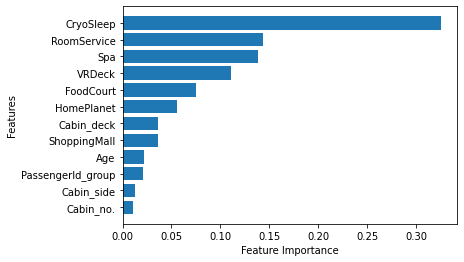

In [ ]:
ideal_features = list(plot_features(X_train.columns, ideal_model.feature_importances_,n=12))

In [ ]:
ideal_features

['CryoSleep',
 'RoomService',
 'Spa',
 'VRDeck',
 'FoodCourt',
 'HomePlanet',
 'Cabin_deck',
 'ShoppingMall',
 'Age',
 'PassengerId_group',
 'Cabin_side',
 'Cabin_no.']

In [ ]:
X_id_train = X_train.filter(ideal_features, axis=1)

In [ ]:
X_id_train

,CryoSleep,RoomService,Spa,VRDeck,FoodCourt,HomePlanet,Cabin_deck,ShoppingMall,Age,PassengerId_group,Cabin_side,Cabin_no.
0,1,0.0,0.0,0.0,0.0,2,2,0.0,39.0,1,1,1
1,1,109.0,549.0,44.0,9.0,1,6,25.0,24.0,2,2,1
2,1,43.0,6715.0,49.0,3576.0,2,1,0.0,58.0,3,2,1
3,1,0.0,3329.0,193.0,1283.0,2,1,371.0,33.0,3,2,1
4,1,303.0,565.0,2.0,70.0,1,6,151.0,16.0,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6949,2,0.0,0.0,0.0,0.0,2,5,0.0,26.0,4966,1,1240
6950,2,0.0,0.0,0.0,0.0,1,7,0.0,43.0,4967,1,206
6951,1,9.0,0.0,0.0,0.0,1,6,1540.0,20.0,4968,2,459
6952,1,40.0,572.0,0.0,0.0,1,6,77.0,19.0,4969,2,460


In [ ]:
X_id_val = X_val.filter(ideal_features, axis=1)

In [ ]:
#Fit the ideal model
ideal_model.fit(X_id_train, y_train)

ideal_model.score(X_id_val,y_val)

0.7998849913743531

In [ ]:
#Fit the ideal model
ideal_model.fit(X1_train, y_train)

ideal_model.score(X1_val,y_val)

0.7337550316273721

In [ ]:
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing,PassengerId_group_is_missing,PassenngerId_no_is_missing
0,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df_temp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing,PassengerId_group_is_missing,PassenngerId_no_is_missing
0,1,2,3,0.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,44.0,1,44.0,44.0,44.0,44.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,2,2,1,49.0,1,49.0,49.0,49.0,49.0,49.0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,3,193.0,1,193.0,193.0,193.0,193.0,193.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,2.0,1,2.0,2.0,2.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y_train

0       False
1        True
2       False
3       False
4        True
        ...  
6949     True
6950    False
6951    False
6952    False
6953     True
Name: Transported, Length: 6954, dtype: bool

In [ ]:
# # Make predictions on the test data
# test_preds = rf_best.predict(test_df_temp)

In [ ]:
# df_preds = pd.DataFrame()
# df_preds['PassengerId']=test_pass_id
# df_preds['Transported']=test_preds.astype('bool')
# df_preds.head()

In [ ]:
# # Export prediction data to csv
# df_preds.to_csv('Submission.csv', index = False)

### Submission made according to RandomSearchCV for ideal model with defined hyperparameters on RandomForestClassifier

In [ ]:
# y_train_pred = ideal_model.predict(X_train)

In [ ]:
# y_val_pred = ideal_model.predict(X_val)

In [ ]:
# accuracy_score(y_train_pred,y_train)

In [ ]:
# accuracy_score(y_val_pred,y_val)

In [ ]:
# # Put models in dictionary

# models={'Logistic_Regression': LogisticRegression(),
#         'K-Nearest_Neighbor': KNeighborsClassifier(),
#         'Random_Forest': RandomForestClassifier(),
#         'Gaussian_Naive_Bayes': GaussianNB()}

# # Create a function to fit and score models
# def fit_and_score(models, X_train,X_val, y_train, y_val):
#     '''
#     Fits and evaluates given machine learning models.
#     models: a dict of different Scikit-Learn machine learning models
#     X_train: training data (no labels)
#     X_val: validating data (no labels)
#     y_train: training labels
#     y_val: valid labels
#     '''
#     # Set random seed
#     np.random.seed(42)
    
#     # Make a dictionary to keep model scores
#     model_scores = {}
    
#     # Run through all the different models
#     for model_name, model in models.items():
        
#         # Fit the models
#         model.fit(X_train, y_train)
        
#         # Score from test data and save to dictionary
#         model_scores[model_name] = model.score(X_val, y_val)
    
#     return model_scores 

In [ ]:
# model_scores = fit_and_score(models, X_train,X_val, y_train, y_val)
# model_scores

In [ ]:
# plt.figure(figsize=(10, 7))

# plt.bar(range(len(model_scores)), list(model_scores.values()), align='center')
# plt.xticks(range(len(model_scores)), list(model_scores.keys()))

# plt.show()

In [ ]:
# # Create a hyperparameter grid for RandomForestClassifier
# ran_for_grid = {'n_estimators': np.arange(100, 500, 50),
#                 'max_depth': [None, 10],
#                 'min_samples_split': np.arange(1, 20, 2),
#                 'min_samples_leaf': np.arange(1, 20, 2)}

# ####{'n_estimators': 90,'min_samples_split': 6,'min_samples_leaf': 15,'max_features': 'auto','max_depth': 10}
# #{'n_estimators': 500,'min_samples_split': 6,'min_samples_leaf': 12,'max_features': 'auto','max_depth': 10}
# #{'n_estimators': 270,'min_samples_split': 18,'min_samples_leaf': 16,'max_features': 'auto','max_depth': None}

In [ ]:
# # Setup grid hyperparameter search for LogisticRegression
# gs_rf = GridSearchCV(RandomForestClassifier(),
#                      param_grid=ran_for_grid,
#                      cv=5,
#                      verbose=True)

In [ ]:

# %%time

# gs_rf.fit(X_train, y_train)
# print(gs_rf.best_params_)
# print(gs_rf.score(X_val,y_val))

# # Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
# # {'max_depth': 9, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 520}
# # 0.8027602070155262
# # CPU times: total: 6h 32min 42s
# # Wall time: 6h 32min 45s

In [ ]:
# print(gs_rf.score(X_val,y_val))

In [ ]:
# # Create a hyperparameter grid for RandomForestClassifier
# ran_for_grid2 = {'n_estimators': np.array(65,70,75),
#                 'max_depth': np.array([9]),
#                 'min_samples_split': [3,4,5],
#                 'min_samples_leaf': [11,12,13]}

In [ ]:
# # Setup grid2 hyperparameter search for LogisticRegression
# gs_rf2 = GridSearchCV(RandomForestClassifier(),
#                      param_grid=ran_for_grid2,
#                      cv=5,
#                      verbose=True)

In [ ]:
# %%time

# gs_rf2.fit(X_train, y_train)
# print(gs_rf2.best_params_)
# print(gs_rf2.score(X_val,y_val))

In [ ]:
# # Create a hyperparameter grid for RandomForestClassifier
# ran_for_grid3 = {'n_estimators': np.array([100]),
#                 'max_depth': np.array([10]),
#                 'min_samples_split': [10, 11, 12],
#                 'min_samples_leaf': [6, 7, 8]}

In [ ]:
# # Setup grid2 hyperparameter search for LogisticRegression
# gs_rf3 = GridSearchCV(RandomForestClassifier(),
#                      param_grid=ran_for_grid3,
#                      cv=5,
#                      verbose=True)

In [ ]:
# %%time

# gs_rf3.fit(X_train, y_train)
# print(gs_rf3.best_params_)
# print(gs_rf3.score(X_val,y_val))

In [ ]:
# print(gs_rf3.score(X_val,y_val))

In [ ]:
# # Make predictions on the test data
# test_preds_1 = gs_rf.predict(test_df_temp)

In [ ]:
# df_preds_1 = pd.DataFrame()
# df_preds_1['PassengerId']=test_pass
# df_preds_1['Transported']=test_preds_1.astype('bool')
# df_preds_1.head()

In [ ]:
# # Export prediction data to csv
# df_preds.to_csv('Submission.csv', index = False)

### Submission made according to GridSearchCV for ideal model with defined hyperparameters on RandomForestClassifier

In [ ]:
#### USING THE GAUSSIAN MIXTURE MODEL ####
from sklearn.mixture import GaussianMixture
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.aic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [ ]:
best_gmm.fit(X)
X1_train = best_gmm.predict_proba(X_train)
X1_val = best_gmm.predict_proba(X_val)

In [ ]:
#### TAKING ONLY TWO MODELS FOR KEEPING IT SIMPLE ####
rf = RandomForestClassifier()

In [ ]:
X1_val.shape, X1_train.shape, X.shape

((1739, 6), (6954, 6), (8693, 34))

In [ ]:
#### GRID SEARCH for BEST TUNING PARAMETERS FOR RandomForest #####
grid_search_rf1 = GridSearchCV(rf, param_grid=dict( ), verbose=3,scoring='accuracy',cv=10).fit(X_train,y_train)
print('Best estimator RandomForest:',grid_search_rf1.best_estimator_,
      '\nBest Score', grid_search_rf1.best_estimator_.score(X_val,y_val),
      '\nBest parameters: ', grid_search_rf1.best_params_)
rf_best = grid_search_rf1.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .................................., score=0.796 total time=   1.7s
[CV 2/10] END .................................., score=0.763 total time=   1.8s
[CV 3/10] END .................................., score=0.720 total time=   1.0s
[CV 4/10] END .................................., score=0.693 total time=   1.0s
[CV 5/10] END .................................., score=0.662 total time=   1.1s
[CV 6/10] END .................................., score=0.735 total time=   1.0s
[CV 7/10] END .................................., score=0.777 total time=   1.0s
[CV 8/10] END .................................., score=0.833 total time=   1.1s
[CV 9/10] END .................................., score=0.826 total time=   1.1s
[CV 10/10] END ................................., score=0.809 total time=   1.0s
Best estimator RandomForest: RandomForestClassifier() 
Best Score 0.8021851638872916 
Best parameters:  {}


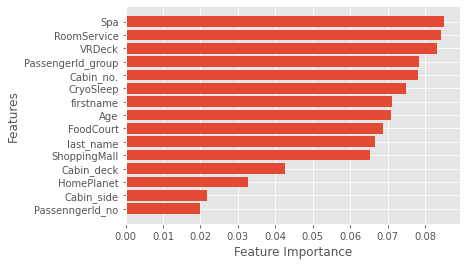

In [ ]:
main_features = list(plot_features(X_train.columns, rf_best.feature_importances_,n=15))

In [ ]:
main_features

['Spa',
 'RoomService',
 'VRDeck',
 'PassengerId_group',
 'Cabin_no.',
 'CryoSleep',
 'firstname',
 'Age',
 'FoodCourt',
 'last_name',
 'ShoppingMall',
 'Cabin_deck',
 'HomePlanet',
 'Cabin_side',
 'PassenngerId_no']

In [ ]:
X_tr_new = pd.DataFrame()
for label, content in X_train.items():
  if label in main_features:
    X_tr_new[label] = content

In [ ]:
X_val_new = pd.DataFrame()
for label, content in X_val.items():
  if label in main_features:
    X_val_new[label] = content

In [ ]:
X_train.shape, X_tr_new.shape, X_val.shape, X_val_new.shape

((6954, 34), (6954, 15), (1739, 34), (1739, 15))

In [ ]:
X_tr_new

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_no.,Cabin_side,firstname,last_name,PassengerId_group,PassenngerId_no
0,2,1,39.0,0.0,0.0,0.0,0.0,0.0,2,1,1,1615,1432,1,1
1,1,1,24.0,109.0,9.0,25.0,549.0,44.0,6,1,2,1408,2110,2,1
2,2,1,58.0,43.0,3576.0,0.0,6715.0,49.0,1,1,2,157,1991,3,1
3,2,1,33.0,0.0,1283.0,371.0,3329.0,193.0,1,1,2,2277,1991,3,2
4,1,1,16.0,303.0,70.0,151.0,565.0,2.0,6,2,2,2643,1779,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,2,2,26.0,0.0,0.0,0.0,0.0,0.0,5,1240,1,1845,1333,4966,1
6950,1,2,43.0,0.0,0.0,0.0,0.0,0.0,7,206,1,933,1930,4967,1
6951,1,1,20.0,9.0,0.0,1540.0,0.0,0.0,6,459,2,209,267,4968,1
6952,1,1,19.0,40.0,0.0,77.0,572.0,0.0,6,460,2,643,1702,4969,1


In [ ]:
grid_search_new = GridSearchCV(rf, param_grid=dict( ), verbose=5,scoring='accuracy',cv=15).fit(X_tr_new,y_train)
print('Best estimator RandomForest:',grid_search_new.best_estimator_,
      '\nBest Score', grid_search_new.best_estimator_.score(X_val_new,y_val),
      '\nBest parameters: ', grid_search_new.best_params_)
rf_best_new = grid_search_new.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .................................., score=0.797 total time=   1.0s
[CV 2/10] END .................................., score=0.767 total time=   1.1s
[CV 3/10] END .................................., score=0.721 total time=   1.0s
[CV 4/10] END .................................., score=0.667 total time=   1.0s
[CV 5/10] END .................................., score=0.650 total time=   1.1s
[CV 6/10] END .................................., score=0.738 total time=   1.0s
[CV 7/10] END .................................., score=0.781 total time=   1.0s
[CV 8/10] END .................................., score=0.835 total time=   1.1s
[CV 9/10] END .................................., score=0.820 total time=   1.0s
[CV 10/10] END ................................., score=0.806 total time=   1.0s
Best estimator RandomForest: RandomForestClassifier() 
Best Score 0.8016101207590569 
Best parameters:  {}


In [ ]:
# Make predictions on the test data
test_preds_n = rf_best_new.predict(test_df_temp)

df_preds_n = pd.DataFrame()
df_preds_n['PassengerId']=test_pass_id
df_preds_n['Transported']=test_preds_n.astype('bool')
df_preds_n.head()

# Export prediction data to csv
df_preds_n.to_csv('Submission.csv', index = False)

### Submission made according to GridSearchCV for Gaussian mixtured model with general hyperparameters on RandomForestClassifier

In [ ]:
# #### GRID SEARCH for BEST TUNING PARAMETERS FOR RandomForest #####
# param_grid = ran_for_grid
# grid_search_rf = GridSearchCV(rf, param_grid=param_grid, verbose=3,scoring='accuracy',cv=10).fit(X_train,y_train)
# print('Best estimator RandomForest:',grid_search_rf.best_estimator_,
#       '\nBest Score', grid_search_rf.best_estimator_.score(X_train,y_train),
#       '\nBest parameters: ', grid_search_rf.best_params_)
# rf_best1 = grid_search_rf.best_estimator_
# # {'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 13, 'n_estimators': 270}
# #{'max_depth': 9, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 520}

In [ ]:
# rf_best.fit(X_train,y_train)
# print(rf_best.predict(X_val)[0:10])
# rf_best1.fit(X_train,y_train)
# print(rf_best1.predict(X_val)[0:10])

In [ ]:
# #### SCORING THE MODELS ####
# print('Score for Random Forest #1:',cross_val_score(rf_best,X_train,y_train,cv=10,scoring='accuracy').max())
# print('Score for Random Forest #2:',cross_val_score(rf_best1,X_train,y_train,cv=10,scoring='accuracy').max())

In [ ]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CryoSleep_is_missing,Destination_is_missing,VIP_is_missing,Cabin_deck_is_missing,Cabin_no._is_missing,Cabin_side_is_missing,firstname_is_missing,last_name_is_missing,PassengerId_group_is_missing,PassenngerId_no_is_missing
0,2,1,3,39.0,1,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,3,24.0,1,109.0,9.0,25.0,549.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,...,False,False,False,False,False,False,False,False,False,False
3,2,1,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,16.0,1,303.0,70.0,151.0,565.0,2.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
raw_train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# # Make predictions on the test data
# test_preds_3 = rf_best1.predict(test_df_temp)

In [ ]:
# df_preds_3 = pd.DataFrame()
# df_preds_3['PassengerId']=test_pass
# df_preds_3['Transported']=test_preds_3.astype('bool')
# df_preds_3.head()

In [ ]:
# # Export prediction data to csv
# df_preds_3.to_csv('Submission.csv', index = False)

### Submission made according to GridSearchCV for Gaussian mixtured model with custom hyperparameters on RandomForestClassifier

In [ ]:
# !pip install xgboost

In [ ]:
# !pip install seaborn

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import xgboost as xgb

### Pipelines for missing values in DataFrame.
We already filled up missing data, but this is alternitive way of doing it..

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", MinMaxScaler())]
)

In [ ]:

cat_cols = X.select_dtypes(exclude="number").columns
num_cols = X.select_dtypes(include="number").columns

In [ ]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HomePlanet                    8693 non-null   int8   
 1   CryoSleep                     8693 non-null   int8   
 2   Destination                   8693 non-null   int8   
 3   Age                           8693 non-null   float64
 4   VIP                           8693 non-null   int8   
 5   RoomService                   8693 non-null   float64
 6   FoodCourt                     8693 non-null   float64
 7   ShoppingMall                  8693 non-null   float64
 8   Spa                           8693 non-null   float64
 9   VRDeck                        8693 non-null   float64
 10  Age_is_missing                8693 non-null   bool   
 11  RoomService_is_missing        8693 non-null   bool   
 12  FoodCourt_is_missing          8693 non-null   bool   
 13  Sho

In [ ]:
# df[['A', 'C']] = df[['A', 'C']].apply(pd.to_numeric)

In [ ]:
X1 = X.copy()

In [ ]:
# check for columns that are boolean
for label, content in X1.items():
    if pd.api.types.is_bool_dtype(content):
        X1[label] = content.astype('int')

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HomePlanet                    8693 non-null   int8   
 1   CryoSleep                     8693 non-null   int8   
 2   Destination                   8693 non-null   int8   
 3   Age                           8693 non-null   float64
 4   VIP                           8693 non-null   int8   
 5   RoomService                   8693 non-null   float64
 6   FoodCourt                     8693 non-null   float64
 7   ShoppingMall                  8693 non-null   float64
 8   Spa                           8693 non-null   float64
 9   VRDeck                        8693 non-null   float64
 10  Age_is_missing                8693 non-null   int64  
 11  RoomService_is_missing        8693 non-null   int64  
 12  FoodCourt_is_missing          8693 non-null   int64  
 13  Sho

In [ ]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df= (pd.DataFrame({'features':columns,
                       'feature_importances':importances})
        .sort_values('feature_importances', ascending=False)
        .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()
    return df['features'][:n]

In [ ]:
y1=y.astype('int')

In [ ]:
X_proc = full_processor.fit_transform(X1)
y_proc = SimpleImputer(strategy="most_frequent").fit_transform(
    y1.values.reshape(-1, 1)
)

In [ ]:
X_xg_train, X_xg_test, y_xg_train, y_xg_test = train_test_split(
    X_proc, y1, stratify=y1, random_state=42
)

```
X = df_temp.drop('Transported', axis=1)
y = df_temp.Transported

X_train = X.iloc[:int(len(X) * 0.8), :]
X_val = X.iloc[int(len(X) * 0.8):, :]
y_train = y.iloc[:int(len(y) * 0.8)]
y_val = y.iloc[int(len(y) * 0.8):]

X_xg_train, X_xg_test, y_xg_train, y_xg_test = train_test_split(
    X_proc, y1, stratify=y1, random_state=42)

```

In [ ]:
X_proc.shape, y_proc.shape, X_train.shape, y_train.shape

((8693, 49), (8693, 1), (6954, 34), (6954,))

In [ ]:
from sklearn.metrics import accuracy_score

# Init classifier
xgb_model = xgb.XGBClassifier()

# Fit
xgb_model.fit(X_train, y_train.ravel())

# Predict
preds = xgb_model.predict(X_val)

# Score
accuracy_score(y_val, preds)

0.7981598619896493

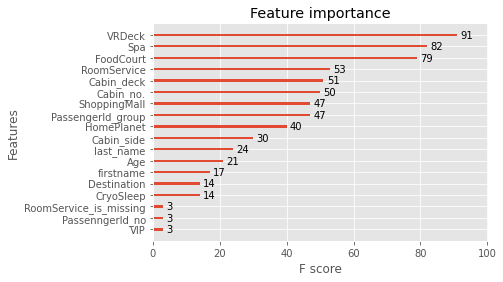

In [ ]:
from xgboost import plot_importance

xgb_ax = plot_importance(xgb_model)
plt.show()

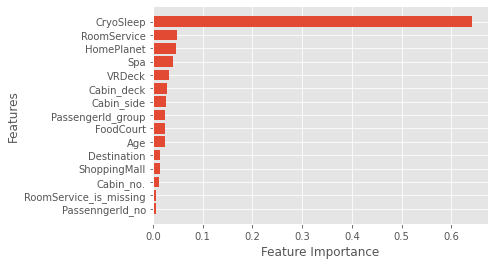

In [ ]:
features = list(plot_features(X_train.columns, xgb_model.feature_importances_,n=15))

In [ ]:
features

['CryoSleep',
 'RoomService',
 'HomePlanet',
 'Spa',
 'VRDeck',
 'Cabin_deck',
 'Cabin_side',
 'PassengerId_group',
 'FoodCourt',
 'Age',
 'Destination',
 'ShoppingMall',
 'Cabin_no.',
 'RoomService_is_missing',
 'PassenngerId_no']

In [ ]:
X_feat = pd.DataFrame()
for label, content in X_train.items():
    if label in features:
        X_feat[label] = content

In [ ]:
X_feat_val = pd.DataFrame()
for label, content in X_val.items():
    if label in features:
        X_feat_val[label] = content

In [ ]:
X_feat

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,RoomService_is_missing,Cabin_deck,Cabin_no.,Cabin_side,PassengerId_group,PassenngerId_no
0,2,1,3,39.0,0.0,0.0,0.0,0.0,0.0,0,2,1,1,1,1
1,1,1,3,24.0,109.0,9.0,25.0,549.0,44.0,0,6,1,2,2,1
2,2,1,3,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,1,2,3,1
3,2,1,3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,1,2,3,2
4,1,1,3,16.0,303.0,70.0,151.0,565.0,2.0,0,6,2,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,2,2,3,26.0,0.0,0.0,0.0,0.0,0.0,0,5,1240,1,4966,1
6950,1,2,2,43.0,0.0,0.0,0.0,0.0,0.0,0,7,206,1,4967,1
6951,1,1,3,20.0,9.0,0.0,1540.0,0.0,0.0,0,6,459,2,4968,1
6952,1,1,2,19.0,40.0,0.0,77.0,572.0,0.0,0,6,460,2,4969,1


In [ ]:
from sklearn.metrics import accuracy_score

# Init classifier
xgb_model1 = xgb.XGBClassifier()

# Fit
xgb_model1.fit(X_feat, y_train.ravel())

# Predict
preds1 = xgb_model1.predict(X_feat_val)

# Score
accuracy_score(y_val, preds1)

0.7935595169637722

0                  CryoSleep
1                RoomService
2                 HomePlanet
3                        Spa
4                     VRDeck
5                 Cabin_deck
6                 Cabin_side
7                  FoodCourt
8                        Age
9          PassengerId_group
10              ShoppingMall
11               Destination
12                 Cabin_no.
13           PassenngerId_no
14    RoomService_is_missing
Name: features, dtype: object

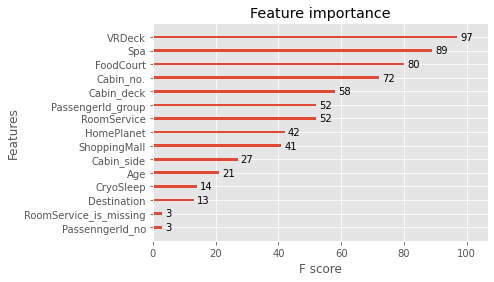

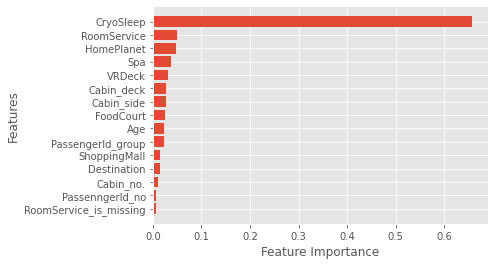

In [ ]:
plot_importance(xgb_model1)
plot_features(X_feat.columns, xgb_model1.feature_importances_,n=15)

### Another way of using basic XGBoost model

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(); print(model)


XGBClassifier()


In [ ]:
expected_y  = y_val
predicted_y = model.predict(X_val)

In [ ]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

## We will try to tune hyperparameters for XGBoost

In [ ]:
model.get_params()     #  model.get_xgb_params()

In [ ]:
param_grid = {
    "max_depth": [1, 2, 3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1, 2, 3],
    "reg_lambda": [0, 1, 10, 20],
    "scale_pos_weight": [0.2, 0.5, 1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
    'n_estimators': [100, 200, 300],
}

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

In [ ]:
%%time

xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=5, scoring="accuracy")

# Fit
grid_cv.fit(X_xg_train, y_xg_train.ravel())

print(f'\nBest score for XGBoost with GridSearchCV -> {grid_cv.best_score_:.2f}%')
print(f'\nBest parameters for XGBoost with GridSearchCV ->\n{grid_cv.best_params_}')

# Score
acc = accuracy_score(y_xg_test, xgb.XGBClassifier(X_xg_test))

print(f'Accuracy score for XGB -> {acc:.2f}%.')

In [ ]:
# Insert the new fixed values to the grid

param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]
param_grid["max_depth"] = [4]
param_grid["learning_rate"] = [0.01]

# Give new value ranges to other params

param_grid["gamma"] = [1, 2, 3]
param_grid["scale_pos_weight"] = [0.2, 0.5, 1]
param_grid["reg_lambda"] = [10, 30, 50]

In [ ]:
%%time
grid_cv_2 = GridSearchCV(xgb_cl, param_grid, 
                         cv=3, scoring="accuracy", n_jobs=-1)

_ = grid_cv_2.fit(X_proc, y_proc)

print(f'\nBest params: {grid_cv_2.best_params_}')
print(f'\nBest score: {grid_cv_2.best_score_}')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Best params: {'colsample_bytree': 0.5, 'gamma': 2, 'learning_rate': 0.01, 'max_depth': 4, 'reg_lambda': 50, 'scale_pos_weight': 1, 'subsample': 0.8}

Best score: 0.7521036055877195
CPU times: user 1.84 s, sys: 69.9 ms, total: 1.91 s
Wall time: 54.8 s


In [ ]:
# Insert the new fixed values to the grid

param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]
param_grid["gamma"] = [2]
param_grid["max_depth"] = [4]
param_grid["learning_rate"] = [0.01]
param_grid["scale_pos_weight"] = [1]

# Give new value ranges to other params

param_grid["reg_lambda"] = [50, 60, 70]

In [ ]:
%%time
grid_cv_3 = GridSearchCV(xgb_cl, param_grid, 
                         cv=5, scoring="accuracy", n_jobs=-1)

_ = grid_cv_3.fit(X_proc, y_proc)

print(f'\nBest params: {grid_cv_3.best_params_}')
print(f'\nBest score: {grid_cv_3.best_score_}')


Best params: {'colsample_bytree': 0.5, 'gamma': 2, 'learning_rate': 0.01, 'max_depth': 4, 'reg_lambda': 50, 'scale_pos_weight': 1, 'subsample': 0.8}

Best score: 0.7689138293965835
CPU times: user 1.01 s, sys: 38 ms, total: 1.04 s
Wall time: 9.94 s


In [ ]:
# Insert the new fixed values to the grid

param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]
param_grid["gamma"] = [1]
param_grid["max_depth"] = [3]
param_grid["scale_pos_weight"] = [1]
param_grid["reg_lambda"] = [10]
param_grid["learning_rate"] = [0.1]

In [ ]:
final_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic"
)

# {'colsample_bytree': 0.5,
#  'gamma': 1,
#  'learning_rate': 0.1,
#  'max_depth': 3,
#  'reg_lambda': 10,
#  'scale_pos_weight': 1,
#  'subsample': 0.8}

In [ ]:
from sklearn.metrics import roc_auc_score

_ = final_cl.fit(X_xg_train, y_xg_train)

preds = final_cl.predict(X_xg_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Score
print(accuracy_score(preds, y_xg_test))

0.7713891444342227


## XGBoostClassifier - max score 0.7953081876724931

In [ ]:
# Make predictions on the test data
test_preds_4 = model.predict(test_df_temp)

In [ ]:
df_preds_4 = pd.DataFrame()
df_preds_4['PassengerId']=test_pass
df_preds_4['Transported']=test_preds_4.astype('bool')
df_preds_4.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
# Export prediction data to csv
df_preds_4.to_csv('Submission.csv', index = False)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [ ]:
!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 2.1 MB/s 


In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score

In [ ]:
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent'
)

In [ ]:
list(test_df_temp)

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [ ]:
test_df_temp.columns.values.tolist()

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [ ]:
categorical_features_indices = np.where(X.dtypes != float)[0]

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_val, y_val),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

## CatBoostClassifier trial

In [ ]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,2,1,150,3,39.0,1,0.0,0.0,0.0,0.0,0.0,5253
1,1,1,2185,3,24.0,1,109.0,9.0,25.0,549.0,44.0,4503
2,2,1,2,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0,458
3,2,1,2,3,33.0,1,0.0,1283.0,371.0,3329.0,193.0,7150
4,1,1,2187,3,16.0,1,303.0,70.0,151.0,565.0,2.0,8320
...,...,...,...,...,...,...,...,...,...,...,...,...
6949,2,2,1956,3,26.0,1,0.0,0.0,0.0,0.0,0.0,5950
6950,1,2,4832,2,43.0,1,0.0,0.0,0.0,0.0,0.0,2892
6951,1,1,2788,3,20.0,1,9.0,0.0,1540.0,0.0,0.0,603
6952,1,1,2790,2,19.0,1,40.0,0.0,77.0,572.0,0.0,1914


In [ ]:
y_train

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
6949    1.0
6950    0.0
6951    0.0
6952    0.0
6953    1.0
Name: Transported, Length: 6954, dtype: float64

In [ ]:
X_val

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
6954,1,2,4848,2,17.0,1,0.0,0.0,0.0,0.0,0.0,7300
6955,1,1,4837,3,62.0,1,240.0,0.0,0.0,586.0,10.0,4083
6956,1,2,4839,3,32.0,1,0.0,0.0,0.0,0.0,0.0,4480
6957,1,2,4841,3,37.0,1,0.0,0.0,0.0,0.0,0.0,3070
6958,1,1,1957,0,40.0,1,0.0,0.0,0.0,7.0,782.0,1908
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2,1,147,1,41.0,2,0.0,6819.0,0.0,1643.0,74.0,3525
8689,1,2,5281,2,18.0,1,0.0,0.0,0.0,0.0,0.0,4781
8690,1,1,5286,3,26.0,1,0.0,0.0,1872.0,1.0,0.0,3003
8691,2,1,2132,1,32.0,1,0.0,1049.0,0.0,353.0,3235.0,1597


In [ ]:
preds=model.predict(X_val)

In [ ]:
print(accuracy_score(preds, y_val))

0.8016101207590569


In [ ]:
# Make predictions on the test data
test_preds_cat = model.predict(test_df_temp)

In [ ]:
df_preds_cat = pd.DataFrame()
df_preds_cat['PassengerId']=test_pass
df_preds_cat['Transported']=test_preds_cat.astype('bool')
df_preds_cat.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
# Export prediction data to csv
df_preds_cat.to_csv('/content/drive/MyDrive/Spaceship_Titanic_binary_class/Submission_cat.csv', index = False)

In [ ]:
CatBoostClassifier()

In [ ]:
import numpy as np

param_dist = {"learning_rate": np.linspace(0,0.2,5),
              "max_depth": np.arange(3, 10)
              }

In [ ]:
%%time
#Instantiate CatBoostClassifier
cbc = CatBoostClassifier()

# #create the grid
# grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = param_dist, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(X_proc,y_proc)

#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

Streaming output truncated to the last 5000 lines.
28:	learn: 0.3433770	total: 472ms	remaining: 15.8s
29:	learn: 0.3407973	total: 487ms	remaining: 15.7s
30:	learn: 0.3374711	total: 502ms	remaining: 15.7s
31:	learn: 0.3366442	total: 517ms	remaining: 15.6s
32:	learn: 0.3342948	total: 534ms	remaining: 15.6s
33:	learn: 0.3331393	total: 549ms	remaining: 15.6s
34:	learn: 0.3323277	total: 564ms	remaining: 15.5s
35:	learn: 0.3304419	total: 579ms	remaining: 15.5s
36:	learn: 0.3282527	total: 594ms	remaining: 15.5s
37:	learn: 0.3257627	total: 609ms	remaining: 15.4s
38:	learn: 0.3249030	total: 625ms	remaining: 15.4s
39:	learn: 0.3231571	total: 650ms	remaining: 15.6s
40:	learn: 0.3206806	total: 665ms	remaining: 15.6s
41:	learn: 0.3197770	total: 682ms	remaining: 15.6s
42:	learn: 0.3176210	total: 699ms	remaining: 15.6s
43:	learn: 0.3158210	total: 715ms	remaining: 15.5s
44:	learn: 0.3143600	total: 730ms	remaining: 15.5s
45:	learn: 0.3130014	total: 745ms	remaining: 15.4s
46:	learn: 0.3111911	total: 760

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 175.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 5130, in fit
    silent, early_stopping_rounds, save_snapshot, snapshot_file, snapshot_interval, init_model, callbacks, log_cout, log_cerr)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 2347, in _fit
    callbacks=callbac

28:	learn: 0.5051769	total: 94.7ms	remaining: 3.17s
29:	learn: 0.5031817	total: 101ms	remaining: 3.26s
30:	learn: 0.5007857	total: 106ms	remaining: 3.32s
31:	learn: 0.4988519	total: 109ms	remaining: 3.31s
32:	learn: 0.4970360	total: 112ms	remaining: 3.29s
33:	learn: 0.4953026	total: 116ms	remaining: 3.28s
34:	learn: 0.4937698	total: 119ms	remaining: 3.27s
35:	learn: 0.4921770	total: 122ms	remaining: 3.26s
36:	learn: 0.4907858	total: 125ms	remaining: 3.25s
37:	learn: 0.4893903	total: 128ms	remaining: 3.25s
38:	learn: 0.4875328	total: 131ms	remaining: 3.24s
39:	learn: 0.4859883	total: 134ms	remaining: 3.22s
40:	learn: 0.4847568	total: 137ms	remaining: 3.21s
41:	learn: 0.4831082	total: 141ms	remaining: 3.22s
42:	learn: 0.4810649	total: 144ms	remaining: 3.21s
43:	learn: 0.4801541	total: 148ms	remaining: 3.21s
44:	learn: 0.4790523	total: 151ms	remaining: 3.2s
45:	learn: 0.4778963	total: 154ms	remaining: 3.2s
46:	learn: 0.4768911	total: 157ms	remaining: 3.19s
47:	learn: 0.4752622	total: 161m

```
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
    'n_estimators':[100, 200, 300]
}
```

In [ ]:
preds=gscv.predict(X_val)

In [ ]:
print(accuracy_score(preds, y_val))

0.6808510638297872
